In [61]:
import pandas as pd
import json
import string
import re
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import collections
import seaborn as sns

In [41]:
df = pd.read_json("Destiny2Reviews.json")

In [42]:
df['Date'] = df['Date'].str.replace(',','')
df['Date'] = df['Date'].str.replace('Posted: ','')

In [43]:
df.Date.str.split(expand=True,)

,0,1,2
0,1,October,2019
1,22,March,2021
2,24,November,2021
3,8,February,2021
4,5,October,2019
...,...,...,...
6175,April,6,None
6176,December,2,2020
6177,September,10,2020
6178,October,18,2019


In [44]:
df[['Day','Month','Year']] = df.Date.str.split(expand=True,)


In [45]:
df = df.drop(['Date'],axis=1)
df

,Recommended,Review,Author,Hours,Day,Month,Year
0,True,With almost 300 hours of Destiny 2 (D2) back o...,Phoenix,689.1,1,October,2019
1,True,its cheaper than meth but will ruin your life ...,Lil Thiccburger,2346.5,22,March,2021
2,True,The perfect description of a toxic relationship,Dami,3240.6,24,November,2021
3,True,Simultaneously the best and most disappointing...,Krooked,1000.2,8,February,2021
4,True,when you look down you can see your legs,DankX,3.2,5,October,2019
...,...,...,...,...,...,...,...
6175,True,"If youre autistic, youd love this game.",Tainted,1435.6,April,6,None
6176,False,Bungie fix your ♥♥♥♥♥♥♥ game,McCLUCKY,650.7,December,2,2020
6177,True,Its fun to play occasionally.,Athena,3009.7,September,10,2020
6178,True,What a S L A P in the F A C E from BUNGO,The Worm,365.7,October,18,2019


In [46]:
df.describe()

,Hours
count,6180.000000
mean,1274.544563
std,1432.940228
min,0.100000
25%,199.900000
50%,830.050000
75%,1880.900000
max,15258.700000


In [47]:
pog = 0
PositiveScore = []
NegativeScore = []
Verdict = []

for i in df['Review']:
    Review1 = i.lower()
    Review1 = Review1.translate(str.maketrans(string.punctuation, '                                ', ''))
    score = SentimentIntensityAnalyzer().polarity_scores(Review1)
    
    PositiveScore.append(score['pos'])
    NegativeScore.append(score['neg'])
    
    if score['neg'] > score['pos']:
        Verdict.append(False)
    elif score['neg'] < score['pos']:
        Verdict.append(True)
    else:
        Verdict.append(None)
    print(score)

{'neg': 0.061, 'neu': 0.763, 'pos': 0.176, 'compound': 0.9995}
{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'compound': -0.7351}
{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}
{'neg': 0.204, 'neu': 0.41, 'pos': 0.386, 'compound': 0.4779}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.341, 'neu': 0.541, 'pos': 0.118, 'compound': -0.6486}
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6808}
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4939}
{'neg': 0.075, 'neu': 0.766, 'pos': 0.159, 'compound': 0.9734}
{'neg': 0.254, 'neu': 0.679, 'pos': 0.066, 'compound': -0.872}
{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'compound': -0.7906}
{'neg': 0.298, 'neu': 0.351, 'pos': 0.351, 'compound': 0.0516}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.25, 'neu': 0.605, 'pos': 0.145, 'compound': -0.6306}
{'neg': 0.219, 'neu': 0.254, 'pos': 0.527, 'compound': 0.5938}
{'neg': 0.156, 'neu': 0.638, 'pos': 0.206, 'compound': 0.1779}
{'neg': 0.0, 'neu'

{'neg': 0.088, 'neu': 0.789, 'pos': 0.123, 'compound': 0.9841}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.071, 'neu': 0.708, 'pos': 0.221, 'compound': 0.6142}
{'neg': 0.117, 'neu': 0.725, 'pos': 0.157, 'compound': 0.3804}
{'neg': 0.202, 'neu': 0.678, 'pos': 0.12, 'compound': -0.9167}
{'neg': 0.073, 'neu': 0.763, 'pos': 0.164, 'compound': 0.9983}
{'neg': 0.058, 'neu': 0.806, 'pos': 0.136, 'compound': 0.9518}
{'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.9894}
{'neg': 0.071, 'neu': 0.706, 'pos': 0.223, 'compound': 0.9757}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.268, 'neu': 0.458, 'pos': 0.275, 'compound': 0.0258}
{'neg': 0.124, 'neu': 0.814, 'pos': 0.062, 'compound': -0.994}
{'neg': 0.753, 'neu': 0.247, 'pos': 0.0, 'compound': -0.7269}
{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
{'neg': 0.096, 'neu': 0.7

{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.106, 'neu': 0.798, 'pos': 0.095, 'compound': -0.0772}
{'neg': 0.037, 'neu': 0.752, 'pos': 0.211, 'compound': 0.9191}
{'neg': 0.071, 'neu': 0.865, 'pos': 0.064, 'compound': -0.4019}
{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.148, 'neu': 0.613, 'pos': 0.239, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.9731}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.058, 'neu': 0.713, 'pos': 0.229, 'compound': 0.8995}
{'neg': 0.087, 'neu': 0.708, 'pos': 0.205, 'compound': 0.9896}
{'neg': 0.084, 'neu': 0.648, 'pos': 0.269, 'compound': 0.9525}
{'neg': 0.027, 'neu': 0.681, 'pos': 0.291, 'compound': 0.9318}
{'neg': 0.04, 'neu': 0.915, 'pos': 0.044, 'compound': 0.128}
{'neg': 0.088, 'neu': 0.774, 'pos': 0.138, 'compound': 0.9963}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.429, '

{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.836}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.381, 'neu': 0.459, 'pos': 0.161, 'compound': -0.5267}
{'neg': 0.095, 'neu': 0.806, 'pos': 0.098, 'compound': -0.3576}
{'neg': 0.091, 'neu': 0.775, 'pos': 0.134, 'compound': 0.842}
{'neg': 0.073, 'neu': 0.596, 'pos': 0.331, 'compound': 0.8319}
{'neg': 0.144, 'neu': 0.796, 'pos': 0.06, 'compound': -0.968}
{'neg': 0.173, 'neu': 0.664, 'pos': 0.164, 'compound': -0.296}
{'neg': 0.063, 'neu': 0.871, 'pos': 0.066, 'compound': 0.0258}
{'neg': 0.053, 'neu': 0.691, 'pos': 0.255, 'compound': 0.9965}
{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.6369}
{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.07, 'neu': 0.732, 'pos': 0.198, 'compound': 0.9986}
{'neg': 0.132, 'neu': 0.773, 'pos': 0.095, 'compound': -0.9868}
{'neg': 0.053, 'ne

{'neg': 0.117, 'neu': 0.777, 'pos': 0.106, 'compound': -0.8524}
{'neg': 0.02, 'neu': 0.73, 'pos': 0.25, 'compound': 0.9787}
{'neg': 0.067, 'neu': 0.667, 'pos': 0.266, 'compound': 0.9958}
{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.9612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.225, 'neu': 0.507, 'pos': 0.268, 'compound': 0.1531}
{'neg': 0.172, 'neu': 0.512, 'pos': 0.316, 'compound': 0.4767}
{'neg': 0.133, 'neu': 0.734, 'pos': 0.133, 'compound': -0.2534}
{'neg': 0.041, 'neu': 0.784, 'pos': 0.175, 'compound': 0.9931}
{'neg': 0.089, 'neu': 0.834, 'pos': 0.077, 'compound': -0.7954}
{'neg': 0.045, 'neu': 0.788, 'pos': 0.167, 'compound': 0.9246}
{'neg': 0.117, 'neu': 0.767, 'pos': 0.116, 'compound': 0.3876}
{'neg': 0.049, 'neu': 0.732, 'pos': 0.219, 'compound': 0.9835}
{'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
{'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.5859}
{'neg': 0.062, '

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
{'neg': 0.025, 'neu': 0.682, 'pos': 0.293, 'compound': 0.9694}
{'neg': 0.047, 'neu': 0.711, 'pos': 0.242, 'compound': 0.9933}
{'neg': 0.066, 'neu': 0.784, 'pos': 0.151, 'compound': 0.938}
{'neg': 0.014, 'neu': 0.827, 'pos': 0.159, 'compound': 0.9702}
{'neg': 0.041, 'neu': 0.597, 'pos': 0.362, 'compound': 0.9659}
{'neg': 0.133, 'neu': 0.778, 'pos': 0.088, 'compound': -0.3558}
{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.9685}
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.3252}
{'neg': 0.0, 'neu': 0.268, 'pos': 0.732, 'compound': 0.802}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4588}
{'neg': 0.299, 'neu': 0.39, 'pos': 0.312, 'compound': 0.0258}
{'neg': 0.209, 'neu': 0.722, 'pos': 0.069, 'compound': -0.6449}
{'neg': 0.038, 'neu': 0.691, 'pos': 0.271, 'compound': 0.8589}
{'neg': 0.024, 'neu': 0.945, 'pos': 0.031, 'compound': 0.3182}
{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.936}
{'neg': 0.0

{'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.8225}
{'neg': 0.346, 'neu': 0.495, 'pos': 0.159, 'compound': -0.5267}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.095, 'neu': 0.72, 'pos': 0.184, 'compound': 0.9893}
{'neg': 0.092, 'neu': 0.825, 'pos': 0.083, 'compound': 0.2114}
{'neg': 0.093, 'neu': 0.684, 'pos': 0.223, 'compound': 0.9912}
{'neg': 0.178, 'neu': 0.661, 'pos': 0.162, 'compound': -0.5286}
{'neg': 0.116, 'neu': 0.763, 'pos': 0.121, 'compound': 0.6313}
{'neg': 0.078, 'neu': 0.75, 'pos': 0.173, 'compound': 0.9927}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.946}
{'neg': 0.091, 'neu': 0.679, 'pos': 0.23, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.7579}
{'neg': 0.086, 

{'neg': 0.217, 'neu': 0.603, 'pos': 0.18, 'compound': -0.6808}
{'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.25}
{'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'compound': -0.8314}
{'neg': 0.061, 'neu': 0.687, 'pos': 0.252, 'compound': 0.7185}
{'neg': 0.244, 'neu': 0.631, 'pos': 0.125, 'compound': -0.9788}
{'neg': 0.389, 'neu': 0.611, 'pos': 0.0, 'compound': -0.7907}
{'neg': 0.11, 'neu': 0.665, 'pos': 0.225, 'compound': 0.4588}
{'neg': 0.122, 'neu': 0.716, 'pos': 0.163, 'compound': 0.9733}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1027}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2263}
{'neg': 0.126, 'neu': 0.768, 'pos': 0.107, 'compound': -0.2023}
{'neg': 0.151, 'neu': 0.697, 'pos': 0.151, 'compound': 0.25}
{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.9337}
{'neg': 0.15, 'neu': 0.648, 'pos': 0.202, 'compound': 0.0772}
{'neg': 0.107, 'neu': 0.356, 'pos': 0.538, 'compound': 0.8979}
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3182}
{'neg': 0.075, 

{'neg': 0.126, 'neu': 0.739, 'pos': 0.136, 'compound': 0.9785}
{'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.158, 'neu': 0.648, 'pos': 0.193, 'compound': 0.34}
{'neg': 0.046, 'neu': 0.722, 'pos': 0.232, 'compound': 0.9819}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.313, 'neu': 0.309, 'pos': 0.378, 'compound': 0.431}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3182}
{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.5267}
{'neg': 0.033, 'neu': 0.866, 'pos': 0.101, 'compound': 0.4854}
{'neg': 0.143, 'neu': 0.701, 'pos': 0.156, 'compound': 0.5658}
{'neg': 0.16, 'neu': 0.651, 'pos': 0.189, 'compound': 0.9603}
{'neg': 0.028, 'neu': 0.87, 'pos': 0.102, 'compound': 0.9001}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.

{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
{'neg': 0.172, 'neu': 0.766, 'pos': 0.063, 'compound': -0.9932}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.875}
{'neg': 0.016, 'neu': 0.784, 'pos': 0.199, 'compound': 0.8819}
{'neg': 0.037, 'neu': 0.84, 'pos': 0.122, 'compound': 0.9821}
{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.7351}
{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}
{'neg': 0.104, 'neu': 0.776, 'pos': 0.12, 'compound': 0.6788}
{'neg': 0.122, 'neu': 0.762, 'pos': 0.116, 'compound': 0.2971}
{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.891}
{'neg': 0.046, 'neu': 0.718, 'pos': 0.237, 'compound': 0.9382}
{'neg': 0.103, 'neu': 0.656,

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5267}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}
{'neg': 0.161, 'neu': 0.745, 'pos': 0.094, 'compound': -0.4019}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.913}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.033, 'neu': 0.719, 'pos': 0.249, 'compound': 0.8729}
{'neg': 0.11, 'neu': 0.702, 'pos': 0.188, 'compound': 0.8663}
{'neg': 0.054, 'neu': 0.775, 'pos': 0.171, 'compound': 0.9883}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compo

{'neg': 0.083, 'neu': 0.614, 'pos': 0.302, 'compound': 0.9549}
{'neg': 0.304, 'neu': 0.38, 'pos': 0.316, 'compound': 0.0258}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.103, 'neu': 0.714, 'pos': 0.183, 'compound': 0.8809}
{'neg': 0.089, 'neu': 0.752, 'pos': 0.159, 'compound': 0.9381}
{'neg': 0.086, 'neu': 0.628, 'pos': 0.286, 'compound': 0.9937}
{'neg': 0.361, 'neu': 0.542, 'pos': 0.097, 'compound': -0.9865}
{'neg': 0.098, 'neu': 0.716, 'pos': 0.186, 'compound': 0.9963}
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.9612}
{'neg': 0.053, 'neu': 0.858, 'pos': 0.089, 'compound': 0.2732}
{'neg': 0.311, 'neu': 0.481, 'pos': 0.208, 'compound': -0.6249}
{'neg': 0.321, 'neu': 0.566, 'pos': 0.113, 'compound': -0.5299}
{'neg': 0.115, 'neu': 0.747, 'pos': 0.138, 'compound': 0.853}
{'neg': 0.089, 'neu': 0.482, 'pos': 0.429, 'compound': 0.83}
{'neg': 0.206, 'neu': 0.737, 'pos': 0.057, 'compound': -0.7269}
{'neg

{'neg': 0.167, 'neu': 0.484, 'pos': 0.349, 'compound': 0.8407}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7992}
{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'compound': 0.8748}
{'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.9719}
{'neg': 0.091, 'neu': 0.824, 'pos': 0.085, 'compound': -0.1935}
{'neg': 0.307, 'neu': 0.302, 'pos': 0.391, 'compound': -0.1129}
{'neg': 0.202, 'neu': 0.601, 'pos': 0.197, 'compound': -0.2732}
{'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.5859}
{'neg': 0.121, 'neu': 0.748, 'pos': 0.131, 'compound': 0.291}
{'neg': 0.137, 'neu': 0.773, 'pos': 0.09, 'compound': -0.7655}
{'neg': 0.159, 'neu': 0.729, 'pos': 0.112, 'compound': -0.8831}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.04, 'neu': 0.806,

{'neg': 0.066, 'neu': 0.816, 'pos': 0.118, 'compound': 0.5767}
{'neg': 0.159, 'neu': 0.729, 'pos': 0.112, 'compound': -0.9976}
{'neg': 0.094, 'neu': 0.841, 'pos': 0.066, 'compound': -0.9558}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'compound': 0.836}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.206, 'neu': 0.561, 'pos': 0.234, 'compound': 0.0772}
{'neg': 0.161, 'neu': 0.787, 'pos': 0.052, 'compound': -0.9383}
{'neg': 0.074, 'neu': 0.817, 'pos': 0.109, 'compound': 0.59}
{'neg': 0.122, 'neu': 0.726, 'pos': 0.153, 'compound': 0.9597}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.085, 'neu': 0.465, 'pos': 0.449, 'compound': 0.8858}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.341, 'pos': 0.659, '

{'neg': 0.062, 'neu': 0.737, 'pos': 0.202, 'compound': 0.9978}
{'neg': 0.178, 'neu': 0.722, 'pos': 0.099, 'compound': -0.6594}
{'neg': 0.034, 'neu': 0.723, 'pos': 0.242, 'compound': 0.9014}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.124, 'neu': 0.608, 'pos': 0.268, 'compound': 0.5161}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.262, 'neu': 0.238, 'pos': 0.5, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.099, 'neu': 0.819, 'pos': 0.082, 'compound': -0.1027}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.106, 'neu': 0.809, 'pos': 0.085, 'compound': -0.7522}
{'neg': 0.117, 'neu': 0.806, 'pos': 0.078, 'compound': -0.7609}
{'neg': 0.172, 'neu': 0.721, 'pos': 0.107, 'compound': -0.8173}
{'neg': 0.059, 'neu': 0.545, 'pos': 0.395, 'compound': 0.9413}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
{'neg': 0.058, 'neu

{'neg': 0.397, 'neu': 0.159, 'pos': 0.444, 'compound': 0.0772}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.069, 'neu': 0.778, 'pos': 0.153, 'compound': 0.968}
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.875}
{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
{'neg': 0.082, 'neu': 0.778, 'pos': 0.14, 'compound': 0.6731}
{'neg': 0.008, 'neu': 0.781, 'pos': 0.211, 'compound': 0.9742}
{'neg': 0.06, 'neu': 0.785, 'pos': 0.155, 'compound': 0.9646}
{'neg': 0.013, 'neu': 0.8, 'pos': 0.187, 'compound': 0.9434}
{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.4588}
{'neg': 0.316, 'neu': 0.427, 'pos': 0.256, 'compound': -0.1779}
{'neg': 0.101, 'neu': 0.783, 'pos': 0.116, 'compound': 0.8796}
{'neg': 0.078, 'neu': 0.697, 'p

{'neg': 0.093, 'neu': 0.339, 'pos': 0.568, 'compound': 0.9041}
{'neg': 0.084, 'neu': 0.815, 'pos': 0.101, 'compound': 0.1567}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}
{'neg': 0.063, 'neu': 0.884, 'pos': 0.053, 'compound': -0.128}
{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.3804}
{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.6833}
{'neg': 0.033, 'neu': 0.696, 'pos': 0.271, 'compound': 0.959}
{'neg': 0.07, 'neu': 0.748, 'pos': 0.182, 'compound': 0.9554}
{'neg': 0.099, 'neu': 0.794, 'pos': 0.106, 'compound': 0.7848}
{'neg': 0.144, 'neu': 0.723, 'pos': 0.133, 'compound': -0.5399}
{'neg': 0.11, 'neu': 0.759, 'pos': 0.131, 'compound': 0.3213}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.404, 'neu': 0.596, '

{'neg': 0.075, 'neu': 0.882, 'pos': 0.043, 'compound': -0.3291}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.054, 'neu': 0.72, 'pos': 0.226, 'compound': 0.7992}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.7717}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.7783}
{'neg': 0.043, 'neu': 0.668, 'pos': 0.289, 'compound': 0.9652}
{'neg': 0.21, 'neu': 0.66, 'pos': 0.13, 'compound': -0.9213}
{'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.8291}
{'neg': 0.15, 'neu': 0.408, 'pos': 0.442, 'compound': 0.6486}
{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.6597}
{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.6124}
{'neg': 0.11, 'neu': 0.786, 'pos': 0.104, 'compound': -0.3182}
{'neg': 0.07, 'neu': 0.808, 'pos': 0.122, 'compound': 0.715}
{'neg': 0.095, 'neu': 0.662, 'pos

{'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound': -0.7717}
{'neg': 0.084, 'neu': 0.708, 'pos': 0.209, 'compound': 0.4391}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.5086}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.7506}
{'neg': 0.227, 'neu': 0.628, 'pos': 0.146, 'compound': -0.7713}
{'neg': 0.155, 'neu': 0.706, 'pos': 0.139, 'compound': -0.4215}
{'neg': 0.065, 'neu': 0.775, 'pos': 0.161, 'compound': 0.9975}
{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.9118}
{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.6124}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.346, 'neu': 0.654, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.219, 'neu': 0.428, 'pos': 0.353, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

{'neg': 0.346, 'neu': 0.374, 'pos': 0.28, 'compound': -0.1779}
{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.2732}
{'neg': 0.104, 'neu': 0.705, 'pos': 0.191, 'compound': 0.3818}
{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'compound': 0.802}
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.147, 'neu': 0.69, 'pos': 0.163, 'compound': 0.9692}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'

{'neg': 0.196, 'neu': 0.468, 'pos': 0.336, 'compound': 0.3187}
{'neg': 0.346, 'neu': 0.374, 'pos': 0.28, 'compound': -0.1779}
{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'compound': 0.9941}
{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4939}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.172, 'neu': 0.696, 'pos': 0.132, 'compound': -0.4767}
{'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.25}
{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.34}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.268, 'neu': 0.458, 'pos': 0.275, 'compound': 0.0258}
{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'compound': -0.6249}
{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.7906}
{'neg': 0.374, 'neu': 0.202, 'pos': 0.424, 'compound': 0.128}
{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 0.761, 

{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.075, 'neu': 0.756, 'pos': 0.169, 'compound': 0.9527}
{'neg': 0.0, 'neu': 0.331, 'pos': 0.669, 'compound': 0.8779}
{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.146, 'neu': 0.665, 'pos': 0.189, 'compound': 0.3174}
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.8481}
{'neg': 0.127, 'neu': 0.683, 'pos': 0.19, 'compound': 0.6151}
{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.8074}
{'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'compound': -0.1027}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.921}
{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.

{'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.34}
{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.5413}
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.9493}
{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.821, 'neu': 0.179, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.6705}
{'neg': 0.029, 'neu': 0.854, 'pos': 0.117, 'compound': 0.7794}
{'neg': 0.061, 'neu': 0.703, 'pos': 0.236, 'compound': 0.9507}
{'neg': 0.232, 'neu': 0.768, 'pos

{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.217, 'neu': 0.627, 'pos': 0.157, 'compound': -0.4854}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.9325}
{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.8481}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.102, 'neu': 0.594, 'pos': 0.304, 'compound': 0.9541}
{'neg': 0.108, 'neu': 0.621, 'pos': 0.271, 'compound': 0.7964}
{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
{'neg': 0.012, 'neu': 0.753, 'pos': 0.235, 'compound': 0.979}
{'neg': 0.062, 'neu': 0.898, 'pos': 0.04, 'compound': -0.6982}
{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.7935}
{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.874, 'pos': 0

{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'compound': 0.8689}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.0772}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.265, 'neu': 0.652, 'pos': 0.083, 'compound': -0.8532}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.7506}
{'neg': 0.093, 'neu': 0.811, 'pos': 0.095, 'compound': -0.4015}
{'neg': 0.103, 'neu': 0.751, 'pos': 0.145, 'compound': 0.9936}
{'neg': 0.142, 'neu': 0.585, 'pos': 0.274, 'compound': 0.7158}
{'neg': 0.079, 'neu': 0.476, 'pos': 0.444, 'compound': 0.8481}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
{'neg': 0.164, 'neu': 0.411, 'pos': 0.425, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
{'neg': 0.062, 'neu': 0.732, 'pos': 0.205, 'compound': 0.6705}
{'neg': 0.0, 'neu': 0.156, 'pos': 0.844, 'compound': 0.8966}
{'neg': 0.0, 'neu': 1.

{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.9413}
{'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'compound': 0.9657}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.743}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
{'neg': 0.195, 'neu': 0.752, 'pos': 0.053, 'compound': -0.8074}
{'neg': 0.099, 'neu': 0.696, 'pos': 0.205, 'compound': 0.875}
{'neg': 0.055, 'neu': 0.744, 'pos': 0.201, 'compound': 0.9186}
{'neg': 0.08, 'neu': 0.701, 'pos': 0.219, 'compound': 0.9867}
{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.8744}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}
{'neg': 0.289, 'neu': 0.48, 'pos': 0.232, 'compound': -0.0031}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'com

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
{'neg': 0.091, 'neu': 0.783, 'pos': 0.126, 'compound': 0.9491}
{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
{'neg': 0.059, 'neu': 0.738, 'pos': 0.203, 'compound': 0.5994}
{'neg': 0.067, 'neu': 0.781, 'pos': 0.153, 'compound': 0.8794}
{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'compound': 0.7003}
{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.8074}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}
{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 0.265, 'pos': 0.735, 'compound': 0.8074}
{'neg': 0.198, 'neu': 0.331, 'pos': 0.471, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
{'neg': 0.133, 'neu': 0.476, 'pos': 0.39, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.785, 'pos': 0.21

{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.4062}
{'neg': 0.019, 'neu': 0.762, 'pos': 0.219, 'compound': 0.9684}
{'neg': 0.031, 'neu': 0.912, 'pos': 0.057, 'compound': 0.5413}
{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.2263}
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.8815}
{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.3716}
{'neg': 0.194, 'neu': 0.762, 'pos': 0.044, 'compound': -0.5759}
{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.9089}
{'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.847}
{'neg': 0.175, 'neu': 0.694, 'pos': 0.131, 'compound': -0.2841}
{'neg': 0.054, 'neu': 0.623, 'pos': 0.323, 'compound': 0.9942}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.247, 'neu': 0.646, 'pos': 0.106, 'compound': -0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.421, 'neu': 0.216, 'pos': 0.363, 'compound': -0.2644}
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.5994}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.6124}
{'neg': 0.023, 'neu': 0.695, 'pos': 0.282, 'compound': 0.9738}
{'neg': 0.083, 'neu': 0.703, 'pos': 0.214, 'compound': 0.9424}
{'neg': 0.348, 'neu': 0.489, 'pos': 0.164, 'compound': -0.6597}
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7579}
{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'compound':

{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.8898}
{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.967}
{'neg': 0.128, 'neu': 0.614, 'pos': 0.258, 'compound': 0.8966}
{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.8107}
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.899}
{'neg': 0.062, 'neu': 0.741, 'pos': 0.197, 'compound': 0.9678}
{'neg': 0.075, 'neu': 0.742, 'pos': 0.183, 'compound': 0.9811}
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.2023}
{'neg': 0.086, 'neu': 0.61, 'pos': 0.305, 'compound': 0.6586}
{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'compound': 0.9685}
{'neg': 0.024, 'neu': 0.794, 'pos': 0.181, 'compound': 0.9982}
{'neg': 0.059, 'neu': 0.691, 'pos': 0.249, 'compound': 0.9978}
{'neg': 0.105, 'neu': 0.745, 'pos': 0.15, 'compound': 0.6861}
{'neg': 0.176, 'neu': 0.583, 'pos': 0.241, 'compound': 0.1999}
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.653}
{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.836}
{'neg': 0.104,

{'neg': 0.388, 'neu': 0.413, 'pos': 0.198, 'compound': -0.5106}
{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.34}
{'neg': 0.086, 'neu': 0.705, 'pos': 0.208, 'compound': 0.972}
{'neg': 0.199, 'neu': 0.762, 'pos': 0.039, 'compound': -0.9743}
{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.151, 'neu': 0.72, 'pos': 0.128, 'compound': -0.5579}
{'neg': 0.046, 'neu': 0.711, 'pos': 0.242, 'compound': 0.9806}
{'neg': 0.148, 'neu': 0.675, 'pos': 0.176, 'compound': 0.7767}
{'neg': 0.073, 'neu': 0.82, 'pos': 0.107, 'compound': 0.9258}
{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.9623}
{'neg': 0.0, 'neu': 0.152, 'pos': 0.848, 'compound': 0.6808}
{'neg': 0.351, 'neu': 0.309, 'pos': 0.34, 'compound': -0.0258}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.128, 'neu': 0.399, 'pos': 0.473, 'compound': 0.7234}
{'neg': 0.227, 'neu': 0.712, 'pos': 0.061, 'compound': -0.7741}
{'neg': 0.0, 'neu': 

{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.118, 'neu': 0.771, 'pos': 0.11, 'compound': -0.0379}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.138, 'neu': 0.578, 'pos': 0.284, 'compound': 0.6815}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.3071}
{'neg': 0.069, 'neu': 0.75, 'pos': 0.181, 'compound': 0.5574}
{'neg': 0.215, 'neu': 0.686, 'pos': 0.099, 'compound': -0.6187}
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.6369}
{'neg': 0.133, 'neu': 0.817, 'pos': 0.049, 'compound': -0.4501}
{'neg': 0.02, 'neu': 0.775, 'pos': 0.206, 'compound': 0.977}
{'neg': 0.068, 'neu': 0.737, 'pos': 0.195, 'compound': 0.9655}
{'neg': 0.067, 'neu': 0.672, 'pos': 0.261, 'compound': 0.7783}
{'neg': 0.0, 'neu': 0.541, 'po

{'neg': 0.295, 'neu': 0.53, 'pos': 0.174, 'compound': -0.1531}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.094, 'neu': 0.783, 'pos': 0.123, 'compound': 0.1406}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.07, 'neu': 0.86, 'pos': 0.07, 'compound': -0.0}
{'neg': 0.25, 'neu': 0.5, 'pos': 0.25, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.128, 'neu': 0.736, 'pos': 0.137, 'compound': -0.0654}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}
{'neg': 0.043, 'neu': 0.735, 'pos': 0.222, 'compound': 0.9543}
{'neg': 0.043, 'neu': 0.73, 'pos':

{'neg': 0.097, 'neu': 0.711, 'pos': 0.191, 'compound': 0.7269}
{'neg': 0.175, 'neu': 0.664, 'pos': 0.161, 'compound': -0.0679}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
{'neg': 0.12, 'neu': 0.746, 'pos': 0.135, 'compound': 0.9516}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.6369}
{'neg': 0.02, 'neu': 0.869, 'pos': 0.112, 'compound': 0.9863}
{'neg': 0.104, 'neu': 0.452, 'pos': 0.444, 'compound': 0.9586}
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'compound': 0.994}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.7928}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6597}
{'neg': 0.511, 'neu': 0.111, 'pos': 0.

{'neg': 0.101, 'neu': 0.734, 'pos': 0.165, 'compound': 0.34}
{'neg': 0.068, 'neu': 0.697, 'pos': 0.235, 'compound': 0.5913}
{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'compound': -0.6031}
{'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.21, 'neu': 0.5, 'pos': 0.29, 'compound': 0.2023}
{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.118, 'neu': 0.829, 'pos': 0.054, 'compound': -0.3182}
{'neg': 0.067, 'neu': 0.816, 'pos': 0.117, 'compound': 0.9959}
{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.8442}
{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'compound': -0.1695}
{'neg': 0.039, 'neu': 0.698, 'pos': 0.263, 'compound': 0.9979}
{'neg': 0.135, 'neu': 0.313, 'pos': 0.552, 'compound': 0.9231}
{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.8834}
{'neg': 0.031, 'neu': 0.882, 'pos': 0.087, 'compound': 0.9865}
{'neg': 0.082, 'neu': 0.918, 'pos': 0.0, 'compound': -0.0191}
{'neg': 0.0, '

{'neg': 0.094, 'neu': 0.702, 'pos': 0.204, 'compound': 0.9663}
{'neg': 0.065, 'neu': 0.788, 'pos': 0.147, 'compound': 0.9421}
{'neg': 0.203, 'neu': 0.722, 'pos': 0.075, 'compound': -0.6315}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.346, 'neu': 0.654, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.021, 'neu': 0.707, 'pos': 0.271, 'compound': 0.9434}
{'neg': 0.175, 'neu': 0.706, 'pos': 0.119, 'compound': -0.9617}
{'neg': 0.347, 'neu': 0.267, 'pos': 0.387, 'compound': 0.0772}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.054, 'neu': 0.489, 'pos': 0.457, 'compound': 0.9076}
{'neg': 0.19, 'neu': 0.57

{'neg': 0.113, 'neu': 0.783, 'pos': 0.104, 'compound': -0.0516}
{'neg': 0.155, 'neu': 0.627, 'pos': 0.218, 'compound': 0.9798}
{'neg': 0.082, 'neu': 0.757, 'pos': 0.161, 'compound': 0.9653}
{'neg': 0.151, 'neu': 0.743, 'pos': 0.106, 'compound': -0.6816}
{'neg': 0.212, 'neu': 0.606, 'pos': 0.182, 'compound': -0.128}
{'neg': 0.105, 'neu': 0.895, 'pos': 0.0, 'compound': -0.4019}
{'neg': 0.331, 'neu': 0.361, 'pos': 0.307, 'compound': -0.1032}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.143, 'neu': 0.675, 'pos': 0.182, 'compound': 0.228}
{'neg': 0.07, 'neu': 0.93, 'pos': 0.0, 'compound': -0.4651}
{'neg': 0.063, 'neu': 0.79, 'pos': 0.148, 'compound': 0.8221}
{'neg': 0.065, 'neu': 0.819, 'pos': 0.116, 'compound': 0.2151}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.051, 'ne

{'neg': 0.132, 'neu': 0.754, 'pos': 0.113, 'compound': -0.959}
{'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'compound': 0.7146}
{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.9118}
{'neg': 0.073, 'neu': 0.898, 'pos': 0.029, 'compound': -0.7211}
{'neg': 0.12, 'neu': 0.768, 'pos': 0.111, 'compound': -0.3288}
{'neg': 0.109, 'neu': 0.768, 'pos': 0.123, 'compound': 0.9202}
{'neg': 0.132, 'neu': 0.749, 'pos': 0.119, 'compound': -0.4752}
{'neg': 0.092, 'neu': 0.752, 'pos': 0.156, 'compound': 0.9752}
{'neg': 0.092, 'neu': 0.764, 'pos': 0.144, 'compound': 0.6124}
{'neg': 0.185, 'neu': 0.745, 'pos': 0.07, 'compound': -0.6943}
{'neg': 0.104, 'neu': 0.763, 'pos': 0.133, 'compound': 0.9004}
{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.189, 'neu': 0.764, 'pos': 0.047, 'compound': -0.5994}
{'neg': 0.076, 'neu': 0.553, 'pos': 0.371, 'compound': 0.9169}
{'neg': 0.374, 'neu': 0.202, 'pos': 0.424, 'compound': 0.12

{'neg': 0.059, 'neu': 0.536, 'pos': 0.405, 'compound': 0.9169}
{'neg': 0.352, 'neu': 0.648, 'pos': 0.0, 'compound': -0.9509}
{'neg': 0.047, 'neu': 0.775, 'pos': 0.178, 'compound': 0.9861}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.348, 'neu': 0.572, 'pos': 0.079, 'compound': -0.9831}
{'neg': 0.061, 'neu': 0.75, 'pos': 0.188, 'compound': 0.9972}
{'neg': 0.0, 'neu': 0.32, 'pos': 0.68, 'compound': 0.7496}
{'neg': 0.138, 'neu': 0.615, 'pos': 0.246, 'compound': 0.4118}
{'neg': 0.067, 'neu': 0.747, 'pos': 0.187, 'compound': 0.4082}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.6908}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.037, 'neu': 0.94, 'pos': 0.023, 'compound': -0.25}


In [48]:
df['Positive Score'] = PositiveScore
df['Negative Score'] = NegativeScore
df['Verdict from Algorithm'] = Verdict

AlgoAccuracy = np.where((df['Verdict from Algorithm'] & df['Recommended']), True, False)

In [49]:
df['Sentiment Analyzer Accuracy'] = AlgoAccuracy

In [50]:
df

,Recommended,Review,Author,Hours,Day,Month,Year,Positive Score,Negative Score,Verdict from Algorithm,Sentiment Analyzer Accuracy
0,True,With almost 300 hours of Destiny 2 (D2) back o...,Phoenix,689.1,1,October,2019,0.176,0.061,True,True
1,True,its cheaper than meth but will ruin your life ...,Lil Thiccburger,2346.5,22,March,2021,0.000,0.321,False,False
2,True,The perfect description of a toxic relationship,Dami,3240.6,24,November,2021,0.425,0.000,True,True
3,True,Simultaneously the best and most disappointing...,Krooked,1000.2,8,February,2021,0.386,0.204,True,True
4,True,when you look down you can see your legs,DankX,3.2,5,October,2019,0.000,0.000,None,False
...,...,...,...,...,...,...,...,...,...,...,...
6175,True,"If youre autistic, youd love this game.",Tainted,1435.6,April,6,None,0.412,0.000,True,True
6176,False,Bungie fix your ♥♥♥♥♥♥♥ game,McCLUCKY,650.7,December,2,2020,0.000,0.000,None,False
6177,True,Its fun to play occasionally.,Athena,3009.7,September,10,2020,0.655,0.000,True,True
6178,True,What a S L A P in the F A C E from BUNGO,The Worm,365.7,October,18,2019,0.000,0.000,None,False


In [51]:
df.to_csv('Destiny2Reviews.csv')

In [52]:
placeholder = ''
months = {'January','February','March','April','May','June','July','August','September','October','November','December'}
for index,row in df.iterrows():
    if row[5] not in months:
        placeholder1 = row[5]
        placeholder2 = row[4]
        df.at[index,'Month'] = placeholder2
        df.at[index,'Day'] = placeholder1

In [54]:
df['Month'].nunique()

12

In [55]:
df.to_csv('Destiny2Reviews.csv')

<AxesSubplot:xlabel='Count', ylabel='Month'>

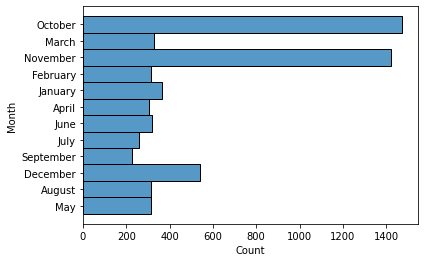

In [64]:
sns.histplot(data=df, y=df['Month'])

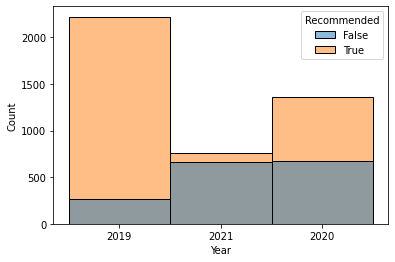

In [68]:
g = sns.histplot(
    data=df,
    x=df['Year'], hue=df['Recommended'] #, element="bars"
    #ci="sd", palette="dark", alpha=.6, height=6
)

ValueError: 'label' must be of length 'x'

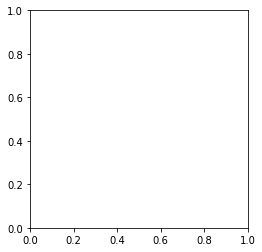

In [69]:

explode = [0.3,0.02,0.02,0.02,0.02]
labels = ['Verfied', 'Non Verified']
colors = sns.color_palette('bright')
plt.pie(df['Sentiment Analyzer Accuracy'],
        labels=labels,
        colors = colors,
        autopct = '%0.0f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'Green','fontsize':16},
        wedgeprops = {'linewidth': 6},
        frame = 'true' ,
        center = (0.1,0.1),
        rotatelabels = 'true')
plt.show()